<a href="https://colab.research.google.com/github/armand010/PembMesin_Ganjil_2024/blob/main/Week9_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,

  - Metode pra pengolahan

  - Pemilihan fitur

  - Arsitektur ANN

  - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.

- **DIKERJAKAN SECARA BERKELOMPOK**

- **JELASKAN HASIL YANG ANDA DAPATKAN,**

  - **AKURASI**

  - **CONFUSION MATRIX**

  - **KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**

## Import Library

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Pra-pengolahan Data

In [2]:
# Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi pixel ke rentang [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding pada label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## ANN

In [5]:
# Inisiasi model ANN
model = Sequential()

# Input layer with shape (28, 28)
model.add(Input(shape=(28, 28)))

# Flatten layer to flatten input 28x28 into a vector 784
model.add(Flatten())

# Hidden layer pertama dengan 128 neuron dan ReLU
model.add(Dense(units=128, activation='relu'))

# Hidden layer kedua dengan 64 neuron dan ReLU
model.add(Dense(units=64, activation='relu'))

# Output layer dengan 10 neuron (untuk 10 digit) dan softmax activation
model.add(Dense(units=10, activation='softmax'))

## Kompilasi dan Pelatihan Model

In [6]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model dengan data latih
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8647 - loss: 0.4674 - val_accuracy: 0.9572 - val_loss: 0.1434
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9656 - loss: 0.1150 - val_accuracy: 0.9678 - val_loss: 0.1049
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9770 - loss: 0.0768 - val_accuracy: 0.9689 - val_loss: 0.1004
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9827 - loss: 0.0540 - val_accuracy: 0.9725 - val_loss: 0.0963
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9863 - loss: 0.0399 - val_accuracy: 0.9761 - val_loss: 0.0852
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 0.9722 - val_loss: 0.0965
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9749 - val_loss: 0.0999
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9932 - loss: 0.022

## Evaluasi Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.1114
Akurasi pada data uji: 97.82%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


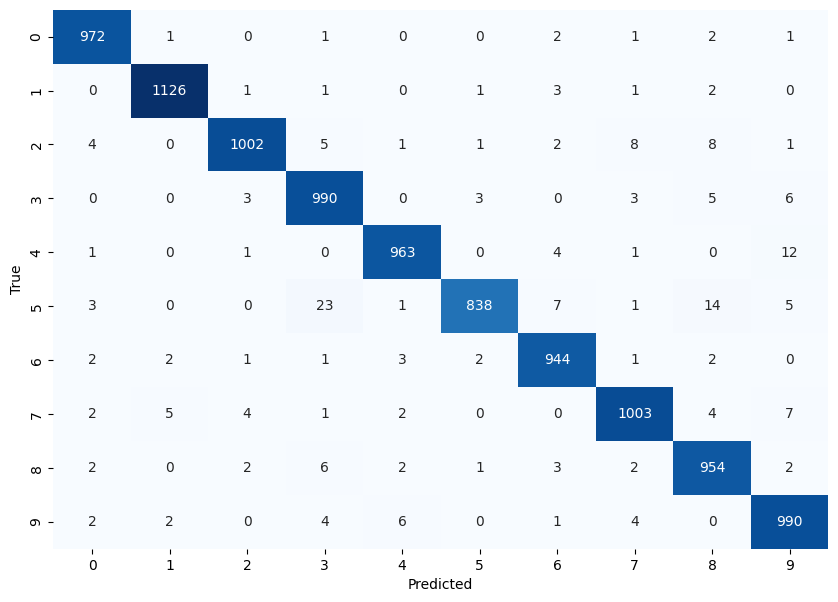

In [7]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi pada data uji: {test_accuracy * 100:.2f}%')

# Prediksi hasil pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Penjelasan

1. Akurasi
  - Model mencapai akurasi sekitar 97.82% setelah 10 epoch pelatihan. Akurasi ini menunjukkan bahwa model sangat mampu memprediksi dengan baik digit-digit pada data MNIST.

2. Confusion Matrix
  - Pada digit MNIST, kesalahan paling sering terjadi pada angka yang memiliki kemiripan dalam bentuk, seperti antara angka "5" dan "3", atau "4" dan "9".

3. Konfigurasi Model
  - Pra-pengolahan: Normalisasi piksel gambar dan one-hot encoding label.
  - Arsitektur ANN:
    - Input: Gambar yang diratakan menjadi vektor 784 elemen.
    - Hidden Layer 1: 128 neuron dengan ReLU.
    - Hidden Layer 2: 64 neuron dengan ReLU.
    - Output Layer: 10 neuron dengan softmax.
  - Optimizer: Adam.
  - Loss Function: Categorical Crossentropy.
  - Epochs: 10.